In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pandas numpy scikit-learn matplotlib seaborn wordcloud


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/PRODIGY_DS_Task1/twitter_training.csv/twitter_training.csv", header=None, names=['ID', 'Entity', 'Sentiment', 'Text'])
df.head()


,ID,Entity,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Text')):
  _plot_series(series, series_name, i)
  fig.legend(title='Text', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['ID']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'ID'}, axis=1)
              .sort_values('ID', ascending=True))
  xs = counted['ID']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('ID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Text')):
  _plot_series(series, series_name, i)
  fig.legend(title='Text', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ID')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_4['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_5['Text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_5, x='index', y='Text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
df.columns

Index(['ID', 'Entity', 'Sentiment', 'Text', 'Clean_Text'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          74682 non-null  int64 
 1   Entity      74682 non-null  object
 2   Sentiment   74682 non-null  object
 3   Text        73996 non-null  object
 4   Clean_Text  74682 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.8+ MB


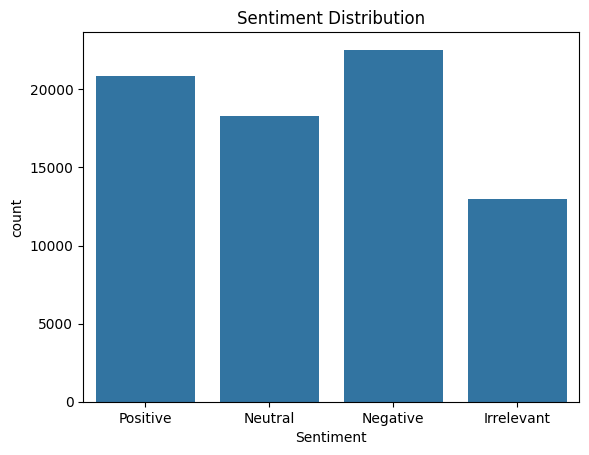

In [ ]:
sns.countplot(x=df['Sentiment'])
plt.title("Sentiment Distribution")
plt.show()


In [ ]:
import re
import string

def preprocess_text(text):
    # Check if text is a string before applying string operations
    if isinstance(text, str):
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'http\S+', '', text)  # Remove URLs
        text = re.sub(r'@\w+', '', text)  # Remove mentions
        text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
        text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
        return text.strip()
    else:
        # Handle non-string values (e.g., NaN) by returning an empty string or a placeholder
        return ''  # Or a placeholder like "MISSING_TEXT"

df['Clean_Text'] = df['Text'].apply(preprocess_text)



,ID,Entity,Sentiment,Text,Clean_Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder y...


In [ ]:
df.head()

,ID,Entity,Sentiment,Text,Clean_Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder y...


In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Clean_Text'])
y = df['Sentiment']

# Encode target labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)  # Converts 'Positive', 'Negative', 'Neutral' to numerical values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6337952734819575
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.33      0.45      2592
           1       0.61      0.82      0.70      4519
           2       0.66      0.50      0.57      3596
           3       0.63      0.74      0.68      4230

    accuracy                           0.63     14937
   macro avg       0.66      0.60      0.60     14937
weighted avg       0.65      0.63      0.62     14937



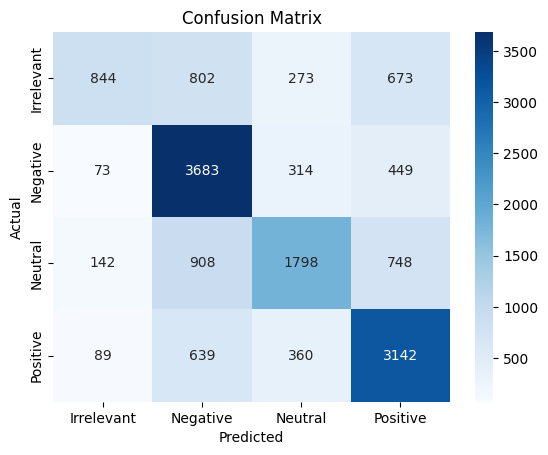

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


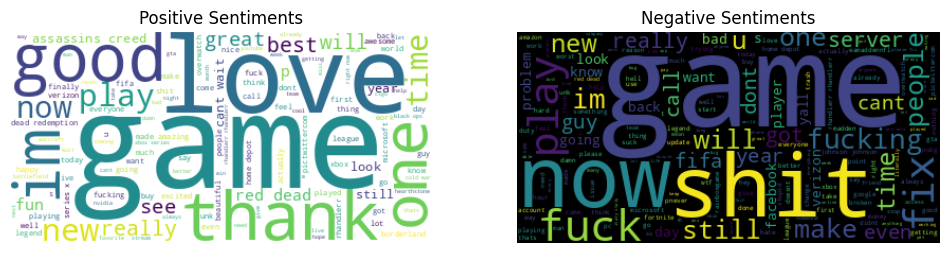

In [ ]:
positive_text = " ".join(df[df['Sentiment'] == 'Positive']['Clean_Text'])
negative_text = " ".join(df[df['Sentiment'] == 'Negative']['Clean_Text'])

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
wordcloud_pos = WordCloud(width=400, height=200, background_color='white').generate(positive_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Sentiments")

plt.subplot(1,2,2)
wordcloud_neg = WordCloud(width=400, height=200, background_color='black').generate(negative_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Sentiments")

plt.show()


In [ ]:
def predict_sentiment(text):
    processed_text = preprocess_text(text)
    transformed_text = vectorizer.transform([processed_text])
    prediction = model.predict(transformed_text)
    return le.inverse_transform(prediction)[0]

sample_text = "I love playing Borderlands, it's an amazing game!"
print("Predicted Sentiment:", predict_sentiment(sample_text))


Predicted Sentiment: Positive


In [ ]:
def predict_sentiment(text):
    processed_text = preprocess_text(text)
    transformed_text = vectorizer.transform([processed_text])
    prediction = model.predict(transformed_text)
    return le.inverse_transform(prediction)[0]

sample_text = "I do not like this game"
print("Predicted Sentiment:", predict_sentiment(sample_text))

Predicted Sentiment: Negative
